In [102]:
#Load the dataset, check the no. of rows, columns,
data = read.csv('data_set_ALL_AML_train.csv', quote='')
dim(data)
head(data)

[1] 7129   78

Gene.Description,Gene.Accession.Number,X1,call,X2,call.1,X3,call.2,X4,call.3,⋯,X29,call.33,X30,call.34,X31,call.35,X32,call.36,X33,call.37
AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,⋯,15,A,-318,A,-32,A,-124,A,-135,A
AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,⋯,-114,A,-192,A,-49,A,-79,A,-186,A
AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,⋯,2,A,-95,A,49,A,-37,A,-70,A
AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,⋯,193,A,312,A,230,P,330,A,337,A
AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,⋯,-51,A,-139,A,-367,A,-188,A,-407,A
AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-5_at,-558,A,-400,A,-650,A,-585,A,⋯,-155,A,-344,A,-508,A,-423,A,-566,A


In [103]:
#Remove call columns
library(tidyverse)
subset_data = select(data, -contains("call"))
dim(subset_data)
head(subset_data)

[1] 7129   40

Gene.Description,Gene.Accession.Number,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X35,X36,X37,X38,X28,X29,X30,X31,X32,X33
AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,⋯,7,-213,-25,-72,-4,15,-318,-32,-124,-135
AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,⋯,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,⋯,-57,136,124,-1,-125,2,-95,49,-37,-70
AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,⋯,132,318,325,392,241,193,312,230,330,337
AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,⋯,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-5_at,-558,-400,-650,-585,-284,-558,-551,-790,⋯,-478,-557,-464,-510,-411,-155,-344,-508,-423,-566


In [104]:
#Load the labels
labels = read.csv('actual.csv')
head(labels)

dim(labels)

patient,cancer
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL
6,ALL


[1] 72  2

In [9]:
#Split ALL versus AML samples from original dataset
library(dplyr)
ALL_samples = subset(labels, cancer == 'ALL')['patient']
AML_samples = subset(labels, cancer == 'AML')['patient']

ALL_column_names = paste0("X", t(ALL_samples['patient']))
AML_column_names = paste0("X", t(AML_samples['patient']))

ALL_train_column_names = intersect(ALL_column_names, colnames(subset_data))
ALL_train_data = select(subset_data, ALL_train_column_names)
head(ALL_train_data)
AML_train_column_names = intersect(AML_column_names, colnames(subset_data))
AML_train_data = select(subset_data, AML_train_column_names)
head(AML_train_data)

In [16]:
#Naive way to run t.test on ALL versus AML samples for each gene
for (i in 1:num_genes){
    out = t.test(ALL_train_data[i,], AML_train_data[i,])
    if (out$p.value < 0.0501){
        print(subset_data[i,2])
        print(out$p.value)
    }
}

[1] AFFX-BioC-5_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.002964378
[1] AFFX-CreX-5_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.01901498
[1] AFFX-CreX-5_st
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.001779394
[1] AFFX-DapX-5_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.01838373
[1] AFFX-LysX-M_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.02289879
[1] AFFX-PheX-M_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.00105037
[1] AFFX-ThrX-5_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.01554529
[1] AFFX-HUMRGE/M10098_M_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.02048565
[1] AFFX-HUMRGE/M10098_3_at
7129 Levels: A28102_at AB000114_at AB000115_at AB000220_at ... Z97074_at
[1] 0.03895986
[1] AFFX-HUMGAPDH

In [15]:
combined = cbind(subset_data['Gene.Accession.Number'], ALL_train_data, AML_train_data)

#Sophisticated way to run t.test
num_ALL_samples = ncol(ALL_train_data)
num_AML_samples = ncol(AML_train_data)
totalsamples = num_ALL_samples + num_AML_samples
numeric_combined = sapply(combined[1:totalsamples], as.numeric)

t.result <- apply(numeric_combined[,1:totalsamples], 1, 
                  function (x) t.test(x[1:num_ALL_samples],x[num_ALL_samples+1:totalsamples]) )

combined$p_value <- unlist(lapply(t.result, function(x) x$p.value))

significant_genes = filter(combined, p_value<0.0501)

Gene.Accession.Number,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38
AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,⋯,15,-318,-32,-124,-135,-20,7,-213,-25,-72
AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,⋯,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,⋯,2,-95,49,-37,-70,-50,-57,136,124,-1
AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,⋯,193,312,230,330,337,101,132,318,325,392
AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,⋯,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324
AFFX-BioDn-5_at,-558,-400,-650,-585,-284,-558,-551,-790,-535,⋯,-155,-344,-508,-423,-566,-529,-478,-557,-464,-510


In [74]:
#Find top significant genes
top_genes = select(head(significant_genes[order(p_value),],10), -contains('p_value'))

top_genes_t = t(top_genes[,2:39])
colnames(top_genes_t) <- top_genes[,1]
cancer = labels[1:38,2]
top_genes_t <- cbind(top_genes_t, cancer)

,X59417_at,U22376_cds2_s_at,M92287_at,J05243_at,U20998_at,D38073_at,AF009426_at,L47738_at,L05148_at,M86752_at,cancer
X1,3016,3105,4778,610,1753,994,36,571,545,294,1
X2,3424,1118,2700,927,1602,539,58,2893,2959,-245,1
X3,7724,4543,4926,1697,2761,1441,63,2723,2458,850,1
X4,3821,5467,5403,425,1486,680,38,731,608,576,1
X5,5216,3469,3440,529,2298,950,120,649,461,1966,1
X6,4194,3309,3179,1682,1013,1258,92,1858,2075,689,1
X7,5528,3936,3978,386,898,509,16,280,488,-418,1
X8,2073,4745,3293,629,1586,331,169,1716,1009,-746,1
X9,7782,4081,7324,2760,2334,1974,43,2388,2379,799,1
X10,5204,1658,2676,1722,878,664,-18,913,1608,909,1


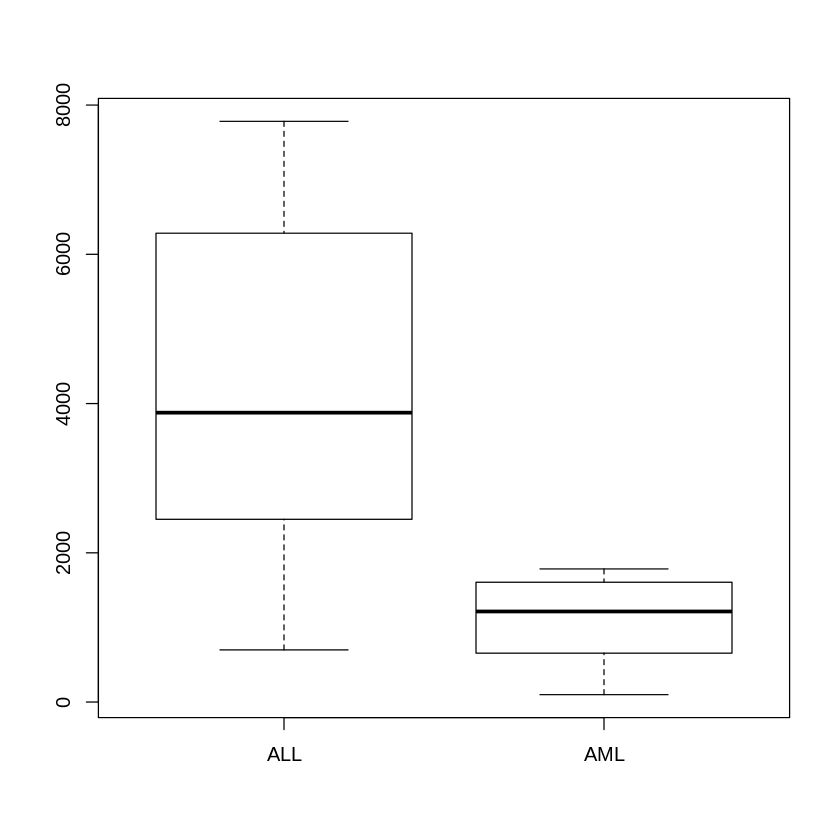

In [77]:
#Boxplot of gene expression of sample gene in ALL versus AML samples
boxplot(X59417_at~cancer, top_genes_t)

In [78]:
#One more way to plot top genes
library(reshape2)


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [83]:
#Flatten the top-genes using 'Gene.Accession.Number' as a key

top_genes_rows <- melt(top_genes, id.vars = 'Gene.Accession.Number')

#Add label data
labels$patient <- paste("X", labels$patient, sep="")

#Join flattened top genes data with labels
top_genes_rows <- merge(top_genes_rows, labels, by.x = "variable", by.y="patient")

head(top_genes_rows)

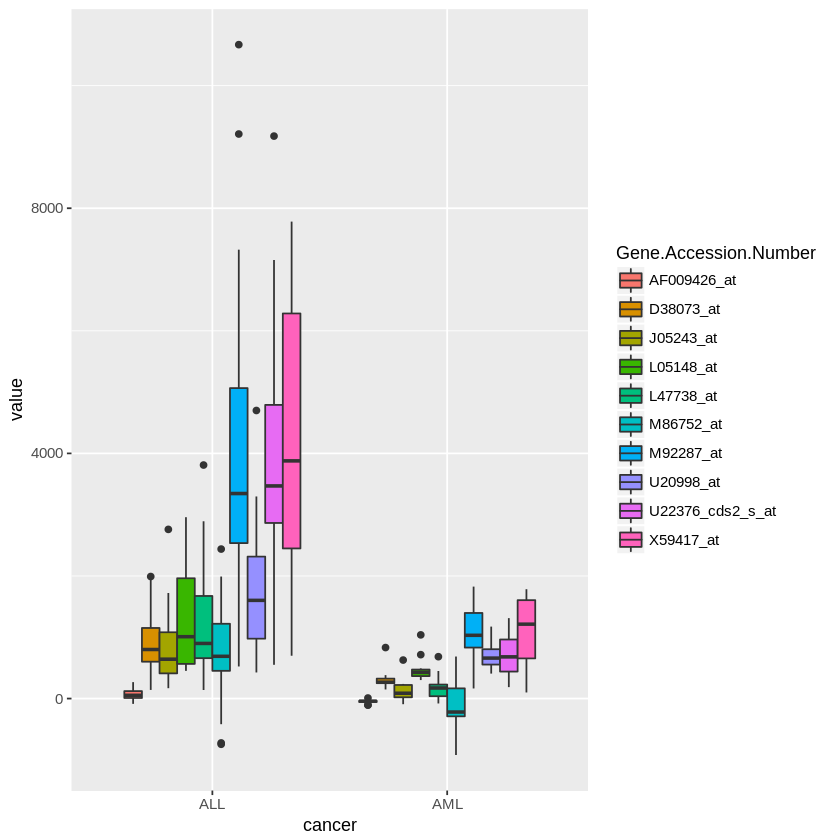

In [100]:
#Plot gene expression value for top 10 genes across ALL versus AML samples
ggplot(top_genes_rows, aes(y=value, x=cancer, fill=Gene.Accession.Number))+geom_boxplot()

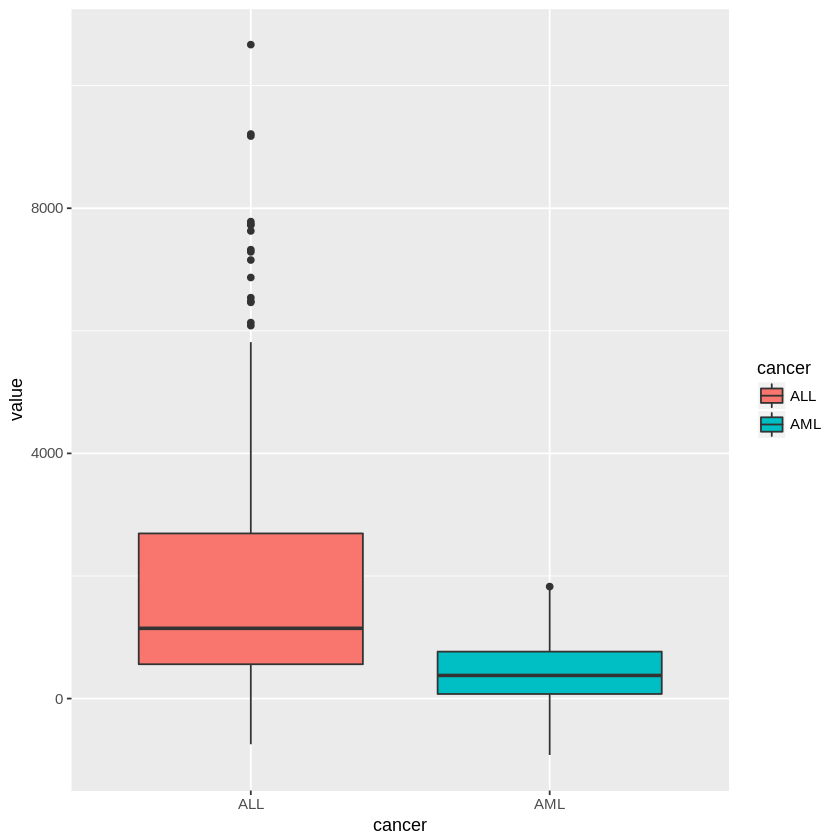

In [101]:
#Aggregate of all top genes
ggplot(top_genes_rows, aes(y=value, x=cancer, fill=cancer))+geom_boxplot()